# Урок 7. Иерархическая кластеризация

Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров.

Иерархическая кластеризация (англ. hierarchical clustering) — множество алгоритмов кластеризации, направленных на создание иерархии вложенных разбиений исходного множества объектов.

Для визуального представления результатов кластеризации используется дендрограмма — дерево, построенное по матрице мер близости между кластерами. В узлах дерева находятся подмножества объектов из обучающей выборки. При этом на каждом ярусе дерева множество объектов из всех узлов составляет исходное множество объектов. Объединение узлов между ярусами соответствует слиянию двух кластеров. При этом длина ребра соответствует расстоянию между кластерами.

**Иерархическая кластеризация разделена на два типа :**

- Агломеративная иерархическая кластеризация

В Агломеративная иерархическая кластеризация, Каждая точка данных рассматривается как один кластер, что формирует общее количество кластеров, равных количеству точек данных. И тогда мы продолжаем группировать данные на основе метрик сходства, делая кластеры, поскольку мы перемещаемся в иерархию. Этот подход также называется подходом снизу вверх.

- Дивизионный метод иерархической кластеризации

Диспектива иерархическая кластеризация противоположна тому, что агломеративный ХК. Здесь мы начинаем с одного кластера, состоящего из всех точек данных. С каждой итерацией мы отделяем точки, которые далеки от других на основе метрик расстояния до тех пор, пока каждый кластер имеет ровно 1 точку данных.

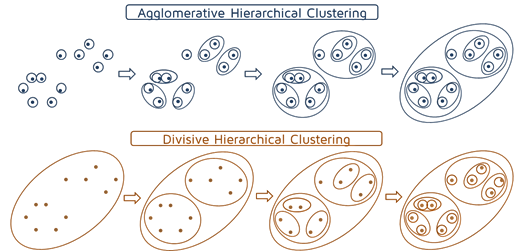

Результат иерархической кластеризации может быть представлен с помощью дендрограммы.

**Дендрограмма** — древовидная диаграмма, содержащая n количество уровней, представляющих собой каждый шаг процесса последовательного укрупнения кластеров.

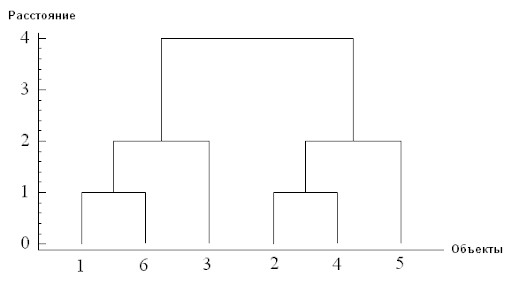

- По оси Х откладываются объекты
- по оси У расстояние между объектами

На оси X у дендрограммы расположены названия объектов, а на оси Y — расстояние, на котором соответствующие объекты, кластеры, объединяются друг с другом.

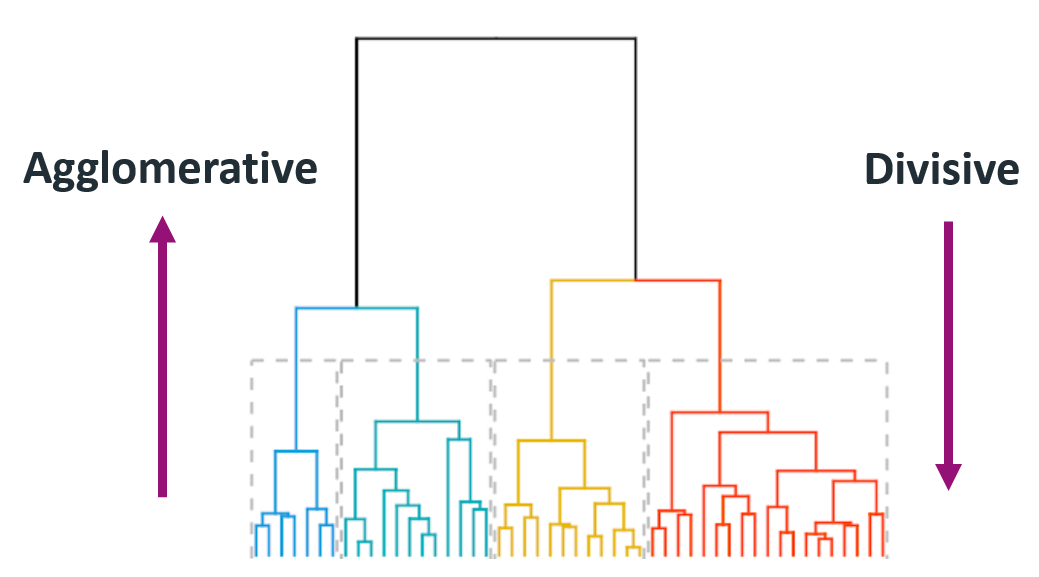

Scikit-learn (sklearn) реализует только агломерационную кластеризацию.

Scipy - иерархическая кластеризаций.

По сравнению с K-средних агломерационные алгоритмы более громоздки и плохо масштабируются для больших наборов данных.
- Агломерационные алгоритмы больше подходят для статистических исследований.
- Эти алгоритмы предлагают преимущество создания полного спектра вложенных кластерных решений.

https://www.kaggle.com/uciml/iris

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Ниже приведены шаги, связанные с агломеративной кластеризацией:**

1. Вначале рассматривайте каждую точку данных как один кластер. Таким образом, число кластеров в начале будет равно K, а K-целое число, представляющее количество точек данных.
2. Сформируйте кластер, соединив две ближайшие точки данных, в результате чего получатся кластеры K-1.
3. Сформируйте больше кластеров, соединив два ближайших кластера, что приведет к кластерам K-2.
4. Повторяйте описанные выше три шага, пока не образуется один большой кластер.
5. Как только один кластер сформирован, дендрограммы используются для разделения на несколько кластеров в зависимости от проблемы. Мы подробно рассмотрим концепцию дендрограммы в следующем разделе.

Существуют различные способы определения расстояния между кластерами. Само расстояние может быть евклидовым или манхэттенским.

`scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)`

- **method:** методы расчета расстояния между вновь сформированным кластером и каждым из них
- **metric:**: метрика расстояния (евклидово расстояние, например)

Есть несколько способов пересчета расстояния между кластерами после их объединения. По-английски эти способы называются Linkage:
1. Первый способ — **Single Linkage**, и в нем расстояние между кластерами вычисляется как минимальное между всеми парами объектов из разных кластеров.
2. Второй способ — **Complete Linkage**. В нем расстояние между кластерами считается как максимальное расстояние между парами объектов из разных кластеров.
3. **Average Linkage** — это просто среднее расстояние между всеми парами объектов из разных кластеров.
4. **Centroid Linkage** — это расстояние между центроидами разных кластеров.
5. **Ward Linkage** — это немного модифицированный Centroid Linkage с учетом размеров самих кластеров.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([101., 142.,   0.,   2.])

In [ ]:
Z[101]

array([212.        , 243.        ,   0.45958753,  14.        ])

В результате в переменной Z мы имеем табличку из четырех столбцов. 

- Первые два столбца содержат в себе индексы объектов, которые на этом шаге будут объединяться. 
- Третий столбец содержит расстояние, на котором эти два объекта будут объединяться.
- Четвертый столбец показывает нам, какой размер кластера получится после объединения на этом шаге.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
label = fcluster(Z, 10, criterion='distance')
# label = fcluster(Z, n_clusters, criterion='n_clusters')

np.unique(label)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1

array([1, 2, 3], dtype=int32)

In [ ]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [ ]:
iris['pred_scipy'] = label
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


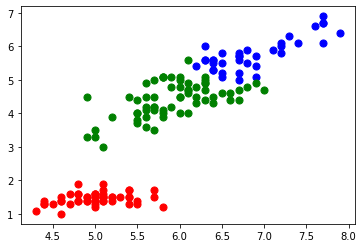

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(iris.loc[label==1, 'sepal_length'], iris.loc[label==1, 'petal_length'], s=50, marker='o', color='red')
plt.scatter(iris.loc[label==2, 'sepal_length'], iris.loc[label==2, 'petal_length'], s=50, marker='o', color='blue')
plt.scatter(iris.loc[label==3, 'sepal_length'], iris.loc[label==3, 'petal_length'], s=50, marker='o', color='green')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
X['pred_sklearn'] = y_hc
X

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


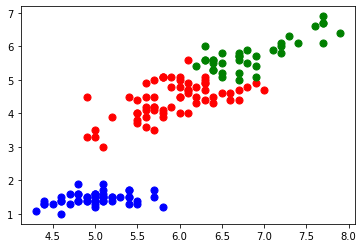

In [ ]:
plt.scatter(X.loc[y_hc==0, 'sepal_length'], X.loc[y_hc==0, 'petal_length'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'sepal_length'], X.loc[y_hc==1, 'petal_length'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'sepal_length'], X.loc[y_hc==2, 'petal_length'], s=50, marker='o', color='green')

plt.show()

# Домашнее задание.

1. Для того же варианта, что и для кластеризации с помощью kmeans, реализовать иерархическую кластеризацию.
2. В иерархической кластеризации необходимо:
  - реализовать ее с помощью библиотеки scipy
  - построить дендрограмму и написать по ней вывод (почему выбрали то или иное количество кластеров судя по этой дендрограмме)
  - визуализировать полученные кластеры по любым двум признакам
  - реализовать иерархическую кластеризацию с помощью библиотеки sklearn
  - визуализировать полученные кластеры по любым двум признакам

3. Все графики должны быть подписаны.